## About

This plot is a [bubble plot](https://python-graph-gallery.com/bubble-plot/). It shows the relation between CO2 emission, vulnerability and readiness to climate change. The size of the bubble is the CO2 emission per habitant in the country. 

The chart was originally made with [React](https://www.react-graph-gallery.com). This post is a translation to Python by [Joseph B.](https://www.barbierjoseph.com). 

Thanks to him for accepting sharing his work here!

Let's see what the final picture will look like:

![preview final chart](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-bubble-plot-with-annotations-and-custom-features.png?raw=true)


## Libraries

First, you need to install the following librairies:
- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for creating the chart and add customization features
- `pandas` is used to put the data into a dataframe

And that's it!

In [1]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd

## Dataset

For this reproduction, we're going to retrieve the data directly from the [gallery's Github repo](https://github.com/holtzy/The-Python-Graph-Gallery). This means we just need to **give the right url as an argument** to pandas' `read_csv()` function to retrieve the data.

In [5]:
url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/data-CO2.csv"
df = pd.read_csv(url)

## Bubble plot with default layout

We'll start by creating a **"simple" graph**, with little customization in order to be progressive. We will create a basic bubble plot, which is just a **more sophisticated** [scatter plot](https://python-graph-gallery.com/scatter-plot/). 

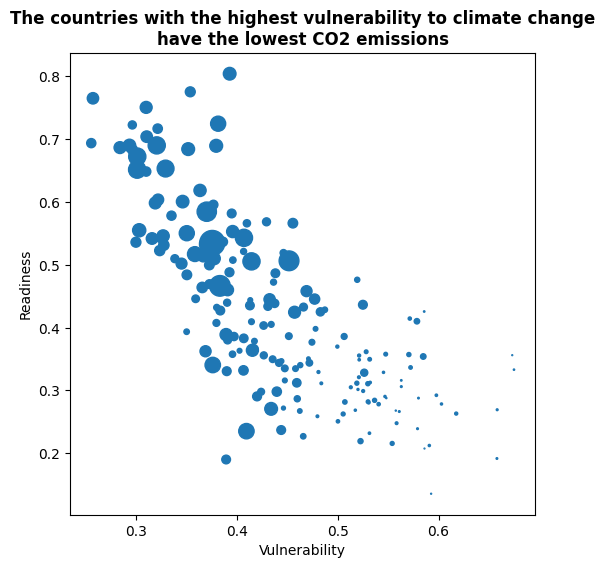

In [7]:
# Init the figure and axe
fig, ax = plt.subplots(figsize=(6, 6))

# Create the plot
ax.scatter(df['&nbsp;'], # x-axis
           df['&nbsp;.1'], # y-axis
           s=df['CO2 per Capita']*10, # size of the bubble (put on a higher scale with *10)
          )

# Add title
ax.set_title('The countries with the highest vulnerability to climate change\nhave the lowest CO2 emissions',
             weight='bold')
ax.set_xlabel('Vulnerability')
ax.set_ylabel('Readiness')

# Show the plot
plt.show()

## Custom color and improve layout

In order to change the color, we just have to add to the `c` argument with the name of the column containing the colors, which is `'Color'` in our case. 

Then, we **remove the spines and ticks** from the chart in order to make it nicer

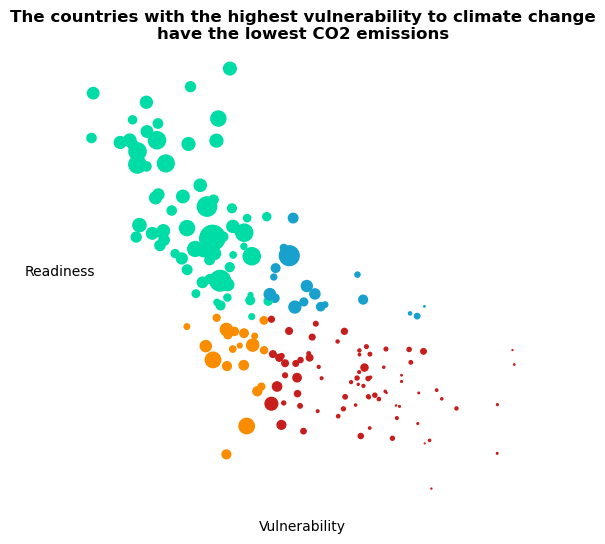

In [10]:
# Init the figure and axe
fig, ax = plt.subplots(figsize=(6, 6))

# Create the plot
ax.scatter(df['&nbsp;'], # x-axis
           df['&nbsp;.1'], # y-axis
           s=df['CO2 per Capita']*10, # size of the bubble (put on a higher scale with *10)
           c=df['Color'],
          )

# Add title
ax.set_title('The countries with the highest vulnerability to climate change\nhave the lowest CO2 emissions',
             weight='bold',)
ax.set_xlabel('Vulnerability')
ax.set_ylabel('Readiness',
              rotation=0, # shift it horizontally
             )

# Remove the spines (border lines) and scale from the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(axis='both', which='both', length=0)

# Show the plot
plt.show()

## Update markers type and add reference lines

To respect the original work, we're now going to change the **style of the markers** to square and add **reference lines** in the middle of the graphic. 

- **change the marker type**: put `marker='s'` when calling the `scatter()` function
- add **reference lines**: use the `axvline()` and `axhline()` functions and specify the relative position, color, style, width and opacity

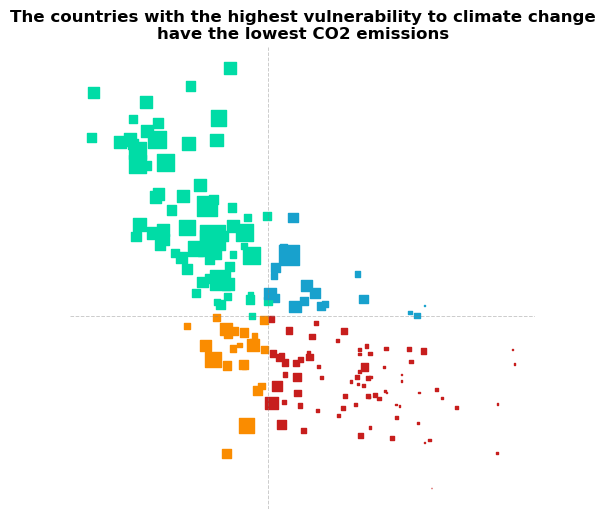

In [11]:
# Init the figure and axe
fig, ax = plt.subplots(figsize=(6, 6))

# Create the plot
ax.scatter(df['&nbsp;'], # x-axis
           df['&nbsp;.1'], # y-axis
           s=df['CO2 per Capita']*10, # size of the bubble (put on a higher scale with *10)
           c=df['Color'],
           marker='s'
          )

# Add title
ax.set_title('The countries with the highest vulnerability to climate change\nhave the lowest CO2 emissions',
             weight='bold')

# Add reference lines
ax.axvline(0.43, color='gray', linestyle='--', linewidth=0.7, alpha=0.4)
ax.axhline(0.41, color='gray', linestyle='--', linewidth=0.7, alpha=0.4)

# Remove the spines (border lines) and scale from the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(axis='both', which='both', length=0)

# Show the plot
plt.show()

The chart is starting to look really nice! It's time to add the annotations and finish it!

## Circle some countries and add annotations

The most complex part of this section is to **automate the process of surrounding a country**.

To do this, we create a `circle_countries()` function that takes as argument a **list of country names** and returns the associated list of border colors (`'black'` for the countries in the list, `default` otherwise).

In [12]:
def circle_countries(country_names: list):
    
    # Init the edge color parameter with its default value: same as font color
    df['EdgeColor'] = df['Color']
    
    # Change the edge color of the countries in the list
    df.loc[df['Name'].isin(country_names), 'EdgeColor'] = 'black'
    
    return df['EdgeColor']

Then we create a `add_country_name()` function that will **add the name of the country** on top of its marker. Our function will **iterate over each name** in the country names list, **find their position** on the chart using `loc()` function and **add their name** at this position thanks to the `text()` function. 

In [13]:
def add_country_name(country_names: list):
    
    # Iterate over each country name
    for country_name in country_names:
        
        # Find position of the country on the axes
        x_axis = df.loc[df['Name']==country_name, '&nbsp;']
        y_axis = df.loc[df['Name']==country_name, '&nbsp;.1']
        
        # Add the text at the right position, slighly shift to the top for lisibility
        ax.text(x_axis, y_axis+0.025, # position
                country_name, # label
                size=6, # size of the text
                ha='center', # align the text
               )

Then, we add the last **annotations** such as the `labels`, `title` and the `arrows` using `text()` and `annotate()` functions. 

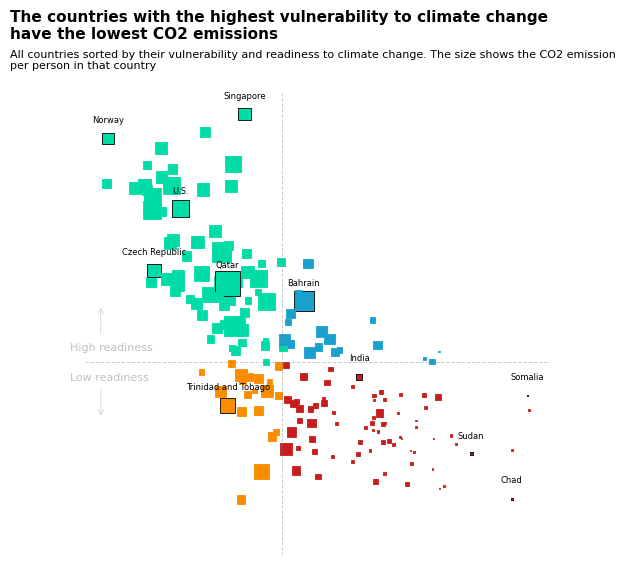

In [14]:
# Init the figure and axe
fig, ax = plt.subplots(figsize=(6, 6))

# Define country to circle
country_to_circle = ['Norway', 'Singapore', 'U.S.', 'Czech Republic', 'Qatar', 'Bahrain',
                     'Somalia', 'Sudan', 'India', 'Trinidad and Tobago', 'Chad']

# Define the edgecolors according to the list
edgecolors = circle_countries(country_to_circle)

# Create the plot
ax.scatter(df['&nbsp;'], # x-axis
           df['&nbsp;.1'], # y-axis
           s=df['CO2 per Capita']*10, # size of the bubble (put on a higher scale with *10)
           c=df['Color'],
           edgecolor=edgecolors,
           linewidths=0.6,
           marker='s',
           zorder=2
          )

# Add country names on top on each marker
add_country_name(country_to_circle)

# Add title
title = 'The countries with the highest vulnerability to climate change\nhave the lowest CO2 emissions'
fig.text(0, 0.97, # relative postion
         title, 
         fontsize=11, # High font size for style
         ha='left', # align to the left
         family='dejavu sans',
         weight='bold'
        )

# Add subtitle
subtitle = 'All countries sorted by their vulnerability and readiness to climate change. The size shows the CO2 emission\nper person in that country'
fig.text(0, 0.92, # relative postion
         subtitle, 
         fontsize=8, # High font size for style
         ha='left', # align to the left
         family='dejavu sans',
         multialignment='left'
        )

# Add reference lines
ax.axvline(0.43, color='gray', linestyle='--', linewidth=0.7, alpha=0.4)
ax.axhline(0.41, color='gray', linestyle='--', linewidth=0.7, alpha=0.4)

# Remove the spines (border lines) and scale from the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(axis='both', which='both', length=0)

# Add labels
fig.text(0.1,0.45,
        'High readiness',
        color='silver',
        size=8)
fig.text(0.1,0.4,
        'Low readiness',
        color='silver',
        size=8)

# Add arrows around labels
arrowprops = dict(arrowstyle="->", color='silver', lw=0.4)
ax.annotate("", xy=(0.25, 0.32), xytext=(0.25, 0.37),
            arrowprops=arrowprops)
ax.annotate("", xy=(0.25, 0.5), xytext=(0.25, 0.45),
            arrowprops=arrowprops)

# Show the plot
plt.show()

## Going further

This article explains how to reproduce a [bubble plot](https://python-graph-gallery.com/bubble-plot/) with annotations, custom colors and nice features. 

For more examples of **advanced customization** in bubble plot, check out this [other very nice plot](https://python-graph-gallery.com/web-scatterplot-astronaut/). Also, you might be interested in [adding text without overlapping](https://python-graph-gallery.com/web-scatterplot-text-annotation-and-regression-matplotlib/) to your chart. 